In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Data/insurance.csv")
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
unique_val=df['children'].nunique()
print(unique_val)

6


In [6]:
df.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [9]:
print(x)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]


In [10]:
print(y)

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse=False,drop='first',categories='auto'),[1,4,5])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7
0,0,1,0,0,1,19,27.9,0
1,1,0,0,1,0,18,33.77,1
2,1,0,0,1,0,28,33,3
3,1,0,1,0,0,33,22.705,0
4,1,0,1,0,0,32,28.88,0


In [12]:
# Splitting the x and y into training and the test set
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.2, random_state=0)

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
regressor = RandomForestRegressor(n_estimators= 8,random_state=50)
regressor.fit(x_tr,y_tr)

RandomForestRegressor(n_estimators=8, random_state=50)

In [14]:
y_pred= regressor.predict(x_te)
y_pred

array([10569.0494937 , 10017.6228084 , 44389.4649672 , 13433.0840159 ,
        9711.8483073 , 12981.0137801 ,  2366.30243325, 12242.7424565 ,
        7716.998072  ,  5938.4502895 ,  7247.6013146 , 16774.3963333 ,
        9682.452389  ,  6561.9701268 , 24642.2443218 , 14069.4612184 ,
       13494.0672845 ,  5885.7626115 ,  6466.4227375 , 34062.2854485 ,
       24018.9951105 , 13049.6497879 , 10971.3284008 , 25612.277978  ,
        2793.0288677 ,  5173.1313157 ,  7034.5042799 ,  8190.0847292 ,
        3839.351635  , 12708.0427621 ,  7718.0266598 , 48227.6643475 ,
       14191.6634105 , 10982.0230142 , 16036.5491968 ,  3875.2170055 ,
        8900.7882957 , 37576.5275274 , 40516.5644526 ,  7002.3962589 ,
       11311.6900919 ,  3453.2823525 , 20623.069149  , 47138.5354803 ,
       37001.176659  ,  6076.6010528 , 14442.1994754 ,  6748.3623005 ,
        5254.742087  , 13778.2728793 ,  3132.3502859 , 13210.6763915 ,
       26498.8143277 , 49041.0762967 , 11639.368185  ,  7173.5109176 ,
      

In [15]:
# we get/print the errors of the model
from sklearn.metrics import mean_squared_error,mean_absolute_error
mae = mean_absolute_error(y_te,y_pred)
mse = mean_squared_error(y_te,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

18560464.999443937
2563.1474651099816
4308.185813012705


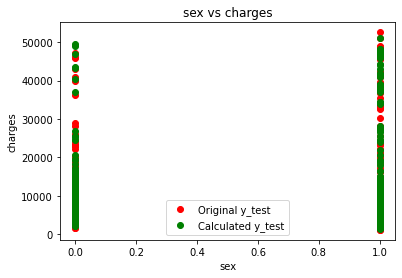

In [16]:
# visualizing the data
plt.scatter(x_te[:,0],y_te,c='red',label = 'Original y_test')
plt.scatter(x_te[:,0],y_pred,c='green',label = 'Calculated y_test')
plt.xlabel('sex')
plt.ylabel('charges')
plt.title('sex vs charges')
plt.legend()
plt.show()

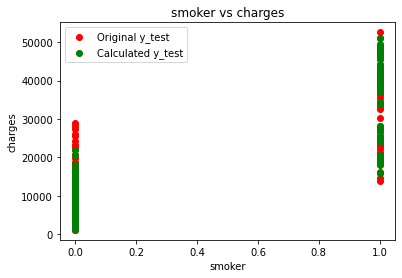

In [17]:
plt.scatter(x_te[:,1],y_te,c='red',label = 'Original y_test')
plt.scatter(x_te[:,1],y_pred,c='green',label = 'Calculated y_test')
plt.xlabel('smoker')
plt.ylabel('charges')
plt.title('smoker vs charges')
plt.legend()
plt.show()

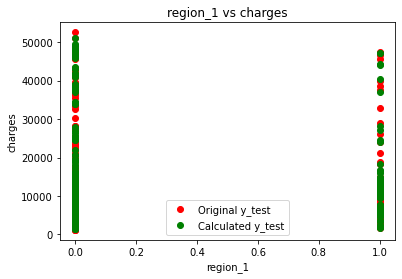

In [18]:
plt.scatter(x_te[:,2],y_te,c='red',label = 'Original y_test')
plt.scatter(x_te[:,2],y_pred,c='green',label = 'Calculated y_test')
plt.xlabel('region_1')
plt.ylabel('charges')
plt.title('region_1 vs charges')
plt.legend()
plt.show()

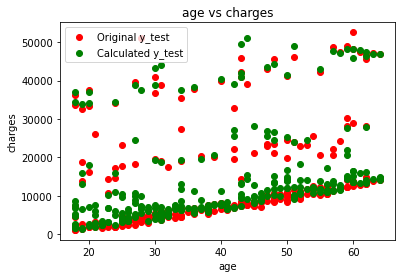

In [19]:
plt.scatter(x_te[:,5],y_te,c='red',label = 'Original y_test')
plt.scatter(x_te[:,5],y_pred,c='green',label = 'Calculated y_test')
plt.xlabel('age')
plt.ylabel('charges')
plt.title('age vs charges')
plt.legend()
plt.show()

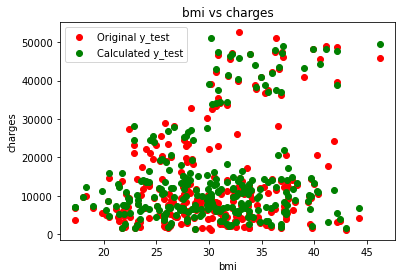

In [20]:
plt.scatter(x_te[:,6],y_te,c='red',label = 'Original y_test')
plt.scatter(x_te[:,6],y_pred,c='green',label = 'Calculated y_test')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.title('bmi vs charges')
plt.legend()
plt.show()

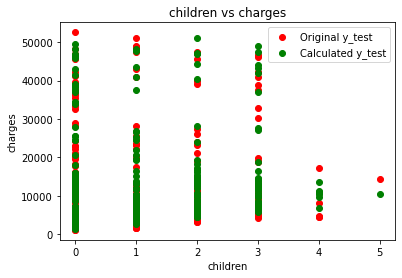

In [21]:
plt.scatter(x_te[:,7],y_te,c='red',label = 'Original y_test')
plt.scatter(x_te[:,7],y_pred,c='green',label = 'Calculated y_test')
plt.xlabel('children')
plt.ylabel('charges')
plt.title('children vs charges')
plt.legend()
plt.show()